In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## PCA(Principal Component Analysis): 주성분분석

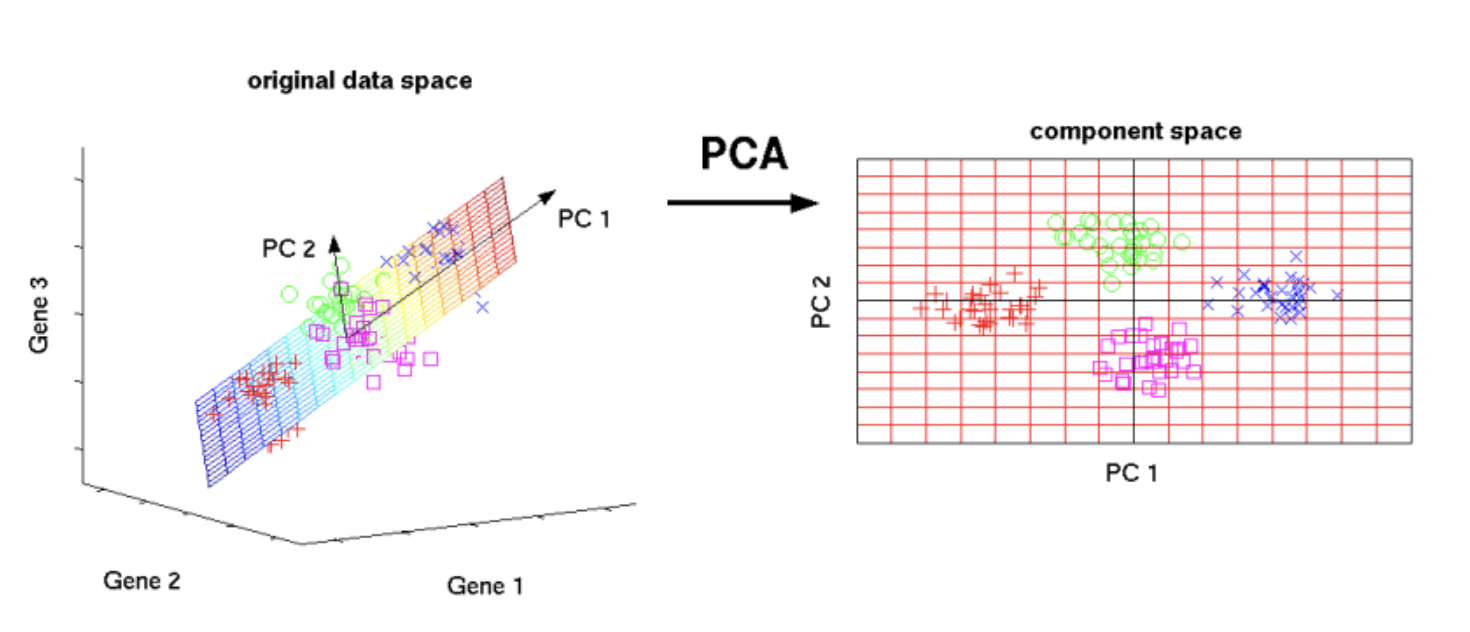

#### 기본 설명

- PCA란 입력 데이터들의 공분산 행렬(covariance matrix)에 대한 고유값 분해
- 기존 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환하는 차원축소기법 중 하나이다.
- 다시말해, 데이터의 분산(variance)을 최대한 보존하는 축(서로 직교하는 새 기저)을 찾아 고차원 공간의 데이터를 선형 연관성이 없는 저차원 공간으로 변환하는 기법입니다.
- PCA는 기존의 변수를 조합하여 서로 연관성이 없는 새로운 변수, 즉 주성분(principal component)을 만들어낸다. 다중공선성을 해결하는 하나의 방법이 되기도 함. 
- feature(Gene 1, Gene 2, ..)가 PC 1와 PC 2로 변경이 되어도 설명이 됨
- 예를 들어, PC1, PC2, PC3이 기존 데이터의 분포를 잘 나타내는 순서라고 하자. 이 때, PC1, PC2, PC3이 기존 데이터의 분포를 약 90%(예시)이상 보존한다면 나머지 10%의 데이터 분포(또는 정보)는 잃어버려도 큰 문제가 없다라고 판단한다.
- 자세한 증명을 알고싶다면 [여기](https://tyami.github.io/machine%20learning/PCA/)를 참고!

#### 사용예시

- 얼굴인식
- 정규화
- 노이즈를 없애는 도구
- 다중공선성이 존재할 때 상관도가 높은 변수를 축소
- 연관성 높은 변수를 제거하여 연산속도 및 결과치 개선
- 다양한 센서데이터를 주성분분석하여 시계열로 분포나 추세를 분석하고 고장징후탐지

#### scikit-learn PCA 예시

- components_: 주성분 축
- n_components_: 주성분의 수
- mean_: 각 성분의 평균
- explained_variance_ratio_: 각 성분의 분산 비율

In [2]:
iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # 컬럼 명
irisDF = pd.DataFrame(iris.data, columns = columns) # 데이터프레임 생성
irisDF['target'] = iris.target # 타깃변수 생성

irisDF.head(3) # 출력

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


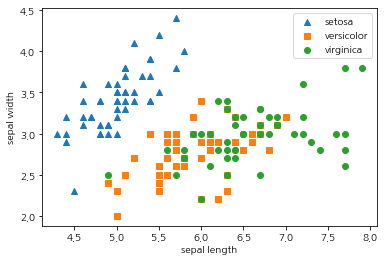

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length') # x축
plt.ylabel('sepal width') # y축
plt.show()

- PCA를 적용하기전 scaling을 진행하는 이유는 무엇일까요?

In [4]:
# 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 근사
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.drop('target', axis=1))
iris_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

- 4개의 feature를 2개로 압축하여 데이터 분포를 2차원(PCA 속성)으로 시각화하기!

In [5]:
# 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공
from sklearn.decomposition import PCA

# PCA 클래스는 n_components라는 PCA로 변환할 차원의 수를 의미하는 생성 파라미터를 인자로 받음
pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# numpy결과값을 pandas dataframe으로 변경
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


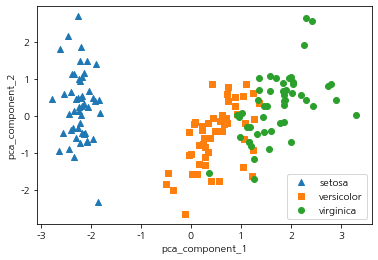

In [7]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA란 데이터의 변동성(분산)을 가장 잘 설명할 수 있는 축을 찾아 데이터 차원을 축소하는 기법
- PCA Component별 원본 데이터의 변동성(분산)을 얼마나 반영하고 있는지 알아보자

In [8]:
# explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차이하는 변동성의 비율을 제공
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫번째 pca_component가 전체 데이터의 약 73%를 차지하고, 두번째가 약 23%를 차지하고 있다. 
- 2개의 pca_component만으로 약 95%를 설명할 수 있다

In [ ]:
# sequential forward/backward selection
# vif, correlation
# name of features
# pca